# Getsafe Data Case

Lucia Blazova



## Introduction

The case study consists of a table of users and of a csv file containing survey responses of the users.


In my analysis I will focus on the following questions:


_1.	Which are the relevant customer clusters? What makes them a good fit for an insurance company?_

_2.	What’s your idea for a “sweet spot” to acquire new customers and how is it characterised (age, customer acquisition channel, certain events in life or lifestyle situations)? In other words, what describes our most valuable customers at time of acquisition?_

_3.	Is “travel health insurance” a good product to acquire especially valuable customers?_


I will create a dictionary to be able to follow the translations. 

## Assessing and Cleaning 

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# having a look at data and its values
users = pd.read_csv('users.csv')
users.head()

,id,gender,born_on,age,age_bucket
0,5f8d6407-7638-42f2-a7ea-b7a56f127868,f,1988-05-31,30.0,30-34
1,89a1ba50-8096-4f34-9937-a531abbc1d73,m,1983-06-25,35.0,35-39
2,2ddf5d88-07cd-4135-b539-6f5d2c57b1ec,m,1991-10-16,27.0,25-29
3,84223cd3-fda2-42b8-a9ba-cf55fc637941,f,1987-01-15,32.0,30-34
4,1943e55d-a803-4c7a-9787-c30ed150db14,m,1991-02-17,28.0,25-29


In [3]:
users.nunique()

id            48064
gender            2
born_on       11882
age              73
age_bucket        9
dtype: int64

In [4]:
# checking for the missing values
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48068 entries, 0 to 48067
Data columns (total 5 columns):
id            48068 non-null object
gender        48043 non-null object
born_on       48060 non-null object
age           48060 non-null float64
age_bucket    48068 non-null object
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [5]:
# converting the column "born_on" to datetime format if needed further in the analysis
# users['born_on']= pd.to_datetime(users['born_on'], format = '%Y-%m-%d')

In [6]:
# checking for the correctnes of the datetime values
# users.born_on.describe()

In [7]:
# importing the responses from survey and merging the datasets on user_id
responses = pd.read_csv('responses.csv')
responses.head()

,#,Wie wohnst du?,"Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?",Besitzt du ein eigenes Auto?,In welchem Beschäftigungsverhältnis stehst du?,Wann wirst du voraussichtlich deinen ersten Job anfangen?,Ist dies dein erster Job?,Wie ist dein aktueller Familienstand?,Hast du Kinder?,Wie bist du auf Getsafe aufmerksam geworden?,...,"Verbundenheit mit Partner/Freunde/Familie(z.B. Gruppenangebote, Grüsse schicken).1",Versicherung besser verstehen(z.B. Schadensprozess oder Prämien verstehen).1,"Sorgenfrei wohnen und umziehen(z.B. Haftpflichtnachweis für Vermieter, Checklisten für den Umzug).1","Erfolg im Beruf(z.B. Bewerbertrainings, podcasts).1",In der Gesellschaft einen Beitrag leisten(z.B. Geld spenden für wohltätige Zwecke).1,user_id,first_name,Start Date (UTC),Submit Date (UTC),Network ID
0,55e67301456961d2f00aa84e4a502398,allein,0.0,0,"angestellt, Vollzeit",NaN,0.0,Single,0,"Vergleichsportale (z.B. Check24, Verivox)",...,1,5,5,1,4,83ffd73c-9928-43f7-939e-990ef2569776,Alice,2019-02-25 21:33:51,2019-02-25 21:38:50,afbc770e41
1,695bb8463823fbb0b2588e40094caf25,allein,0.0,0,auf Arbeitssuche,NaN,NaN,Single,1,Empfehlung von Freunden/ Bekannten,...,3,1,3,2,1,849052a7-7b23-4419-bd12-2988f7fabb72,Silke,2019-02-25 21:27:22,2019-02-25 21:32:52,edad1b6e65
2,4086ec9711a5f15e65737ab71d41214a,allein,0.0,0,im Studium,später,NaN,Single,0,"Vergleichsportale (z.B. Check24, Verivox)",...,1,4,4,1,1,98caf5d8-48a5-4197-a9d7-09d0244f6efc,Julian,2019-02-25 21:28:01,2019-02-25 21:31:34,df1d0b0fac
3,ee449a7aaf34da7450827abcbe2e829c,mit meinem Partner/meiner Partnerin,0.0,1,"angestellt, Vollzeit",NaN,1.0,in einer Partnerschaft,0,"Spezialangebote (z.B. MyDealz, Groupon)",...,4,4,2,4,2,d901950e-0e70-460f-a8e2-f18b9d69a837,Sabine,2019-02-25 21:12:46,2019-02-25 21:17:27,b83e3d1175
4,59333cfd506de01d6236a83f7ba43a72,allein,0.0,1,selbstständige Tätigkeit,NaN,0.0,geschieden,0,"Vergleichsportale (z.B. Check24, Verivox)",...,2,3,2,4,2,3f0b0ffa-8f30-4050-9ecf-873b08951d7c,Maria,2019-02-25 21:01:25,2019-02-25 21:05:20,72aba531db


The table responses lacks a bit of intuitiveness. Some columns with questions seem to be repeatitive and don't provide any further guidelines. For the purpose of this analysis, I will suppose that the responses about the insurance products are evaluating how important are the particular products for customers on a scales from 0 to 5, 5 being the highest importance.

In [8]:
#having a look at the variety of responses from the survey
responses.nunique()

#                                                                                                      2668
Wie wohnst du?                                                                                            5
Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?                                               2
Besitzt du ein eigenes Auto?                                                                              2
In welchem Beschäftigungsverhältnis stehst du?                                                            8
Wann wirst du voraussichtlich deinen ersten Job anfangen?                                                 6
Ist dies dein erster Job?                                                                                 2
Wie ist dein aktueller Familienstand?                                                                     5
Hast du Kinder?                                                                                           2
Wie bist du auf Getsafe aufm

In [9]:
# renaming the user_id column to id so that it s easier to joint the dfs later on
responses.rename(columns={"user_id": "id"}, inplace = True)
responses.head()

,#,Wie wohnst du?,"Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?",Besitzt du ein eigenes Auto?,In welchem Beschäftigungsverhältnis stehst du?,Wann wirst du voraussichtlich deinen ersten Job anfangen?,Ist dies dein erster Job?,Wie ist dein aktueller Familienstand?,Hast du Kinder?,Wie bist du auf Getsafe aufmerksam geworden?,...,"Verbundenheit mit Partner/Freunde/Familie(z.B. Gruppenangebote, Grüsse schicken).1",Versicherung besser verstehen(z.B. Schadensprozess oder Prämien verstehen).1,"Sorgenfrei wohnen und umziehen(z.B. Haftpflichtnachweis für Vermieter, Checklisten für den Umzug).1","Erfolg im Beruf(z.B. Bewerbertrainings, podcasts).1",In der Gesellschaft einen Beitrag leisten(z.B. Geld spenden für wohltätige Zwecke).1,id,first_name,Start Date (UTC),Submit Date (UTC),Network ID
0,55e67301456961d2f00aa84e4a502398,allein,0.0,0,"angestellt, Vollzeit",NaN,0.0,Single,0,"Vergleichsportale (z.B. Check24, Verivox)",...,1,5,5,1,4,83ffd73c-9928-43f7-939e-990ef2569776,Alice,2019-02-25 21:33:51,2019-02-25 21:38:50,afbc770e41
1,695bb8463823fbb0b2588e40094caf25,allein,0.0,0,auf Arbeitssuche,NaN,NaN,Single,1,Empfehlung von Freunden/ Bekannten,...,3,1,3,2,1,849052a7-7b23-4419-bd12-2988f7fabb72,Silke,2019-02-25 21:27:22,2019-02-25 21:32:52,edad1b6e65
2,4086ec9711a5f15e65737ab71d41214a,allein,0.0,0,im Studium,später,NaN,Single,0,"Vergleichsportale (z.B. Check24, Verivox)",...,1,4,4,1,1,98caf5d8-48a5-4197-a9d7-09d0244f6efc,Julian,2019-02-25 21:28:01,2019-02-25 21:31:34,df1d0b0fac
3,ee449a7aaf34da7450827abcbe2e829c,mit meinem Partner/meiner Partnerin,0.0,1,"angestellt, Vollzeit",NaN,1.0,in einer Partnerschaft,0,"Spezialangebote (z.B. MyDealz, Groupon)",...,4,4,2,4,2,d901950e-0e70-460f-a8e2-f18b9d69a837,Sabine,2019-02-25 21:12:46,2019-02-25 21:17:27,b83e3d1175
4,59333cfd506de01d6236a83f7ba43a72,allein,0.0,1,selbstständige Tätigkeit,NaN,0.0,geschieden,0,"Vergleichsportale (z.B. Check24, Verivox)",...,2,3,2,4,2,3f0b0ffa-8f30-4050-9ecf-873b08951d7c,Maria,2019-02-25 21:01:25,2019-02-25 21:05:20,72aba531db


In [10]:
# users around 48 000, responses around 2 660
# performing right join
df = users.merge(responses, how = 'right', on = 'id')
df.head()

,id,gender,born_on,age,age_bucket,#,Wie wohnst du?,"Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?",Besitzt du ein eigenes Auto?,In welchem Beschäftigungsverhältnis stehst du?,...,Produktivität(z.B. Erinnerungen an wichtige Verpflichtungen im Jahr).1,"Verbundenheit mit Partner/Freunde/Familie(z.B. Gruppenangebote, Grüsse schicken).1",Versicherung besser verstehen(z.B. Schadensprozess oder Prämien verstehen).1,"Sorgenfrei wohnen und umziehen(z.B. Haftpflichtnachweis für Vermieter, Checklisten für den Umzug).1","Erfolg im Beruf(z.B. Bewerbertrainings, podcasts).1",In der Gesellschaft einen Beitrag leisten(z.B. Geld spenden für wohltätige Zwecke).1,first_name,Start Date (UTC),Submit Date (UTC),Network ID
0,84223cd3-fda2-42b8-a9ba-cf55fc637941,f,1987-01-15,32.0,30-34,ee9a36ca39ea0ae30e6af840b590f436,allein,0.0,1,"angestellt, Teilzeit",...,1,1,2,1,3,3,Gloria,2019-02-22 09:21:32,2019-02-22 09:31:16,6acdad0b2d
1,ce1a6946-3b10-41da-b9af-17fb3cc9b526,f,1990-08-10,28.0,25-29,1cde359dd67232a723e1185c70bf36a7,allein,0.0,0,"angestellt, Vollzeit",...,3,3,5,4,1,2,Annina,2019-02-21 15:17:41,2019-02-21 15:22:25,f27592ab6b
2,b9ad6a8a-b592-4675-8b20-c2e206abc7fb,f,1993-10-14,25.0,25-29,1a4926ebbb8dcead3b22c6e55ba92293,in einer WG,NaN,0,"angestellt, Vollzeit",...,1,2,5,5,2,3,Celine,2019-02-21 11:40:29,2019-02-21 11:44:14,b3da05bc7b
3,8757636f-bed6-457c-8c47-363c817d04a4,m,1997-01-03,22.0,18-24,7f4b24bc3adb0c0640a538bb0e04a99f,in einer WG,NaN,1,"angestellt, Teilzeit",...,2,2,4,3,2,2,Lukas,2019-02-21 11:06:07,2019-02-21 11:12:29,b3a6061939
4,c71e03b9-1670-47dc-89a3-c1dc27155ed7,m,1984-11-29,34.0,30-34,f16ec07de3846ee5bee4b5ecce3d912a,in einer WG,NaN,0,in Ausbildung,...,2,5,5,5,5,1,Dawid,2019-02-21 15:27:26,2019-02-21 15:31:32,d931651e5f


In [11]:
# checking if the length corresponds to the length of the responses df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2667
Data columns (total 66 columns):
id                                                                                                     2668 non-null object
gender                                                                                                 2648 non-null object
born_on                                                                                                2650 non-null object
age                                                                                                    2650 non-null float64
age_bucket                                                                                             2650 non-null object
#                                                                                                      2668 non-null object
Wie wohnst du?                                                                                         2668 non-null object
Ist die Wohnung oder das

In [12]:
# double-checking for duplicated rows
df.duplicated().sum()

0

### Creating  a dictionary of the survey questions with English translations for easier access

In [13]:
# saving English translations of the German questions (columns) in a separate list, 
# so that I can work on a dictionary to get an easier access later on
translations = ['#',
 'How do you live?',
 'Is the apartment or house where you live your property?',
 'Do you own a car?',
 'What is your employment relationship?',
 'When will you probably start your first job?',
 'Is this your first job?',
 'What is your current marital status?',
 'Do you have children?',
 'How did you find out about Getsafe?',
 'Other',
 'statutory health insurance',
 'Private health insurance',
 'Travel insurance',
 'Household',
 'Personal liability',
 'Legal',
 'Disability insurance',
 'Car Insurance',
 'Animal liability',
 'Drones insurance',
 'Accident insurance',
 'Building insurance',
 'Term life insurance',
 'Other.1',
 'Why did you opt for liability insurance back then?',
 'Living financially carefree',
 'Keeping and improving health',
 'Experiencing joy in everyday life',
 'Spending time with partner, friends and family',
 'personally evolve',
 'Being really good in one area (job, hobby)',
 'Structure in life and everyday life',
 'make a social contribution',
 'Other.2',
 'Financial peace of mind (eg saving, monitoring expenditure)',
 'Maintain and promote health (e.g., reminders for routine examinations)',
 'Safety in everyday life (eg weather warnings, disasters)',
 'Living and traveling abroad (eg foreign health insurance, vaccination recommendations)',
 'Personal development (eg learning language, being creative)',
 'Productivity (eg reminders of important commitments in the year)',
 'Bonding with partner / friends / family (eg group offers, sending greetings)',
 'Understand insurance better (eg understand damage process or premiums)',
 'Living and moving without worries (eg proof of liability for landlords, checklists for moving) ',
 'Success in the job (eg job application training, podcasts)',
 'Contributing to society (for example donating money to charity)',
 'Financial peace of mind (eg saving, monitoring expenditure) .1',
 'Maintain and promote health (e.g. memories for routine examinations) .1 ',
 'Safety in everyday life (eg weather warnings, catastrophes) .1',
 'Living and traveling abroad (eg foreign health insurance, vaccination recommendations) .1',
 'Personal development (eg learning language, being creative) .1',
 'Productivity (eg reminders of important commitments in the year) .1',
 'Bonding with partner / friends / family (eg group offers, sending greetings) .1',
 'Understand insurance better (eg understand damage process or premiums) .1',
 'Living and moving without worries (eg proof of liability for landlords, checklists for moving) .1 ',
 'Success in the job (eg job application training, podcasts) .1',
 'Contribute to society (for example donating money to charity) .1',
 'User_id',
 'first name',
 'Start Date (UTC)',
 'Submit Date (UTC)',
 'Network ID']

In [14]:
# creating a ditionary for the English translations of columns
my_dictionary = {}
for i in range(len(list(responses))-1):
    my_dictionary[list(responses)[i]]= translations[i]
my_dictionary

{'#': '#',
 'Wie wohnst du?': 'How do you live?',
 'Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?': 'Is the apartment or house where you live your property?',
 'Besitzt du ein eigenes Auto?': 'Do you own a car?',
 'In welchem Beschäftigungsverhältnis stehst du?': 'What is your employment relationship?',
 'Wann wirst du voraussichtlich deinen ersten Job anfangen?': 'When will you probably start your first job?',
 'Ist dies dein erster Job?': 'Is this your first job?',
 'Wie ist dein aktueller Familienstand?': 'What is your current marital status?',
 'Hast du Kinder?': 'Do you have children?',
 'Wie bist du auf Getsafe aufmerksam geworden?': 'How did you find out about Getsafe?',
 'Other': 'Other',
 'gesetzliche Krankenversicherung': 'statutory health insurance',
 'private Krankenversicherung': 'Private health insurance',
 'Auslandskrankenversicherung': 'Travel insurance',
 'Hausrat': 'Household',
 'Privathaftpflicht': 'Personal liability',
 'Rechtsschutz': 'Legal',
 'Beruf

## Exploration part

## Questions 1 and 2:

### Which are the relevant customer clusters? What makes them a good fit for an insurance company?

A relevant customer for an insurance company is the one who is in ability of purchasing an insurance product. In general we are talking about different groups of adults (working or not) who are eligible to purchase such a product. Depending on their life situation, financial situation, and risk avoidance level, each group can be targetted by a different product that is suitable to their needs. The more valuable assets the person owns, the more likely he or she is to purchase an insurance product.
Customers owning cars, or older customer owning houses will obviously be a target for the car and house insurances. On the other hand, young customers might me more into the travel or tech insurance products (such as the drone insurance, for example).
Both, customers having their assets insured and those who are just starting to look around their furst insurance contracts might be relevant for an insurance company. These can either attract and provide the first contracts to those who don't have any yet, or offer better contarcacts to those, who already have some (e.x. better coverage for travel insurances, new insurance for a new car, etc..).

### What’s your idea for a “sweet spot” to acquire new customers and how is it characterised (age, customer acquisition channel, certain events in life or lifestyle situations)? In other words, what describes our most valuable customers at time of acquisition?


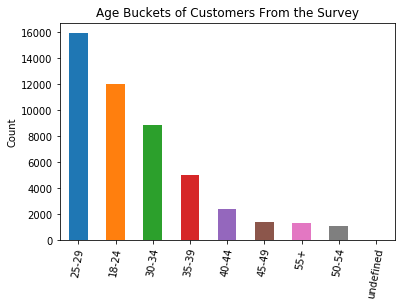

In [40]:
# chart for age_buckets
users.age_bucket.value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=80)
plt.title("Age Buckets of Customers From the Survey")
plt.show();

In [16]:
#looking at the quartiles
users.age.describe()

count    48060.000000
mean        30.386850
std          9.002037
min         18.000000
25%         25.000000
50%         28.000000
75%         34.000000
max         99.000000
Name: age, dtype: float64

Majority of the clients of Getsafe seem to be in their 20s or early 30s. The generation of Millenials. Furthemore, users between 18-34 years old represent 75% of our dataset. Obviously, we can conclude this product attracts young and tech savvy people who reached the age when they are getting their insurance contracts and who are a perfect target group who doesn't have everything covered yet.

In [17]:
# accessing the translations
lookup_list = pd.Series(my_dictionary)
lookup_list[lookup_list.values == 'How did you find out about Getsafe?']

Wie bist du auf Getsafe aufmerksam geworden?    How did you find out about Getsafe?
dtype: object

In [18]:
# looking at the unique values and counts
df['Wie bist du auf Getsafe aufmerksam geworden?'].value_counts()

Vergleichsportale (z.B. Check24, Verivox)     1386
Google Suche (z.B. Suche nach Haftpflicht)     361
Spezialangebote (z.B. MyDealz, Groupon)        316
Empfehlung von Freunden/ Bekannten             261
Social Media (z.B. Facebook, Instagram)        161
Partner (z.B. e-fellows, Drohnen.de)           102
Textbeiträge (z.B. Blog, Tagespresse)           28
Veranstaltung (z.B. Karrieremesse, Meetup)      13
Name: Wie bist du auf Getsafe aufmerksam geworden?, dtype: int64

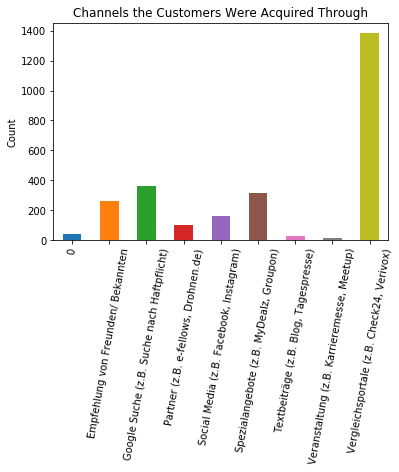

In [41]:
# acquisition channel chart
df.groupby(['Wie bist du auf Getsafe aufmerksam geworden?'])['Wie bist du auf Getsafe aufmerksam geworden?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=80)
plt.title("Channels the Customers Were Acquired Through")
plt.show();

As shown above, we can see most customers were acquired through a comparison platform Verivox, which was far more successful than all the other channels and social media efforts.
However, supposing the results from Google search were organic, 14% is also a good result.

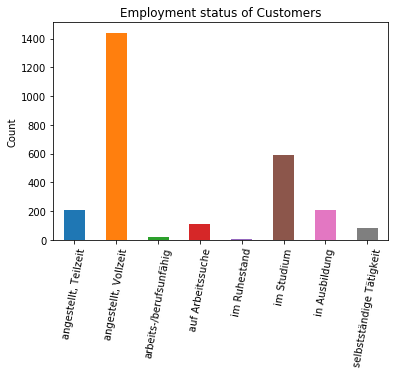

In [42]:
# employment status chart
df.groupby(['In welchem Beschäftigungsverhältnis stehst du?'])[ 'In welchem Beschäftigungsverhältnis stehst du?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation = 80)
plt.title("Employment status of Customers")
plt.show();

In [21]:
# getting the exact values
df['In welchem Beschäftigungsverhältnis stehst du?'].value_counts()

angestellt, Vollzeit        1441
im Studium                   594
angestellt, Teilzeit         208
in Ausbildung                205
auf Arbeitssuche             110
selbstständige Tätigkeit      83
arbeits-/berufsunfähig        20
im Ruhestand                   7
Name: In welchem Beschäftigungsverhältnis stehst du?, dtype: int64

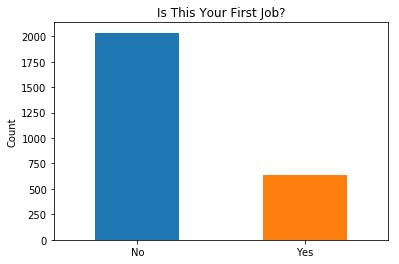

In [44]:
# geting a chart for "Is this your first job" for those who earlier replied they are working
df.groupby(['Ist dies dein erster Job?'])['Ist dies dein erster Job?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'], rotation = 0)
plt.xlabel("")
plt.title("Is This Your First Job?")
plt.show();

The biggest part of the customers are people working full time. More than half of these are having their first jobs, and therefore getting their first non-family insurance ocntracts.

However, quite a noticable part of the customers is students. This group might be especially valuable and attarctive for the future purposes when they start acquiring assets and might consider several insurance products.

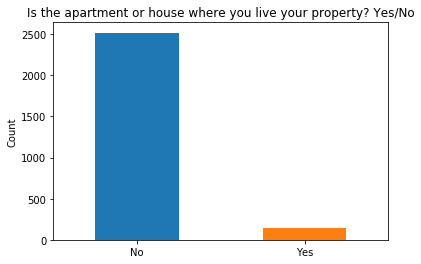

In [46]:
# Is the apartment or house where you live your property? Yes/No
df.groupby(['Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?'])['Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'], rotation = 0)
plt.xlabel("")
plt.title("Is the apartment or house where you live your property? Yes/No")
plt.show();

In [24]:
df['Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?'].value_counts()

0.0    1658
1.0     149
Name: Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?, dtype: int64

In [25]:
# % of customers who own a property they live in
no_property = (df['Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?'].sum() ) /(df['Ist die Wohnung oder das Haus, wo du wohnst, dein Eigentum?'].count() )
no_property

0.08245711123408965

Only a very small % of all customers owns a property. Almost 92% claims they don't own the place they live in. Here we see potential for people getting insurances for their houses in the future. Good technical and customer experience and a good offer from Getsafe might be crucial for keeping this group of people and offer them relevant products in the future.

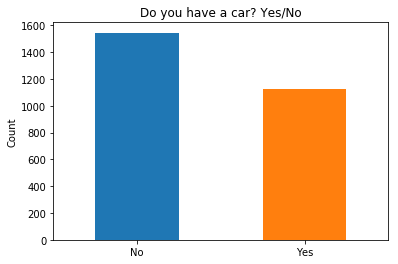

In [47]:
#do you have a car?
df.groupby(['Besitzt du ein eigenes Auto?'])['Besitzt du ein eigenes Auto?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'], rotation = 0)
plt.xlabel("")
plt.title("Do you have a car? Yes/No")
plt.show();

In [98]:
df.groupby(['Besitzt du ein eigenes Auto?'])['Besitzt du ein eigenes Auto?'].count()

Besitzt du ein eigenes Auto?
0    1545
1    1123
Name: Besitzt du ein eigenes Auto?, dtype: int64

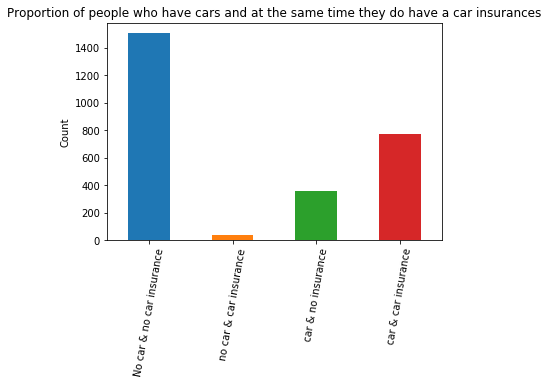

In [104]:
# has a car and 'Car Insurance'
df.groupby(["Besitzt du ein eigenes Auto?", 'KFZ Versicherung'])['Besitzt du ein eigenes Auto?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("")
plt.xticks([0,1,2, 3], ['No car & no car insurance', 'no car & car insurance', 'car & no insurance', 'car & car insurance'], rotation = 80)

plt.title("Proportion of people who have cars and at the same time they do have a car insurances")
plt.show();

In [100]:
df.groupby(["Besitzt du ein eigenes Auto?", 'KFZ Versicherung'])['Besitzt du ein eigenes Auto?'].count()


Besitzt du ein eigenes Auto?  KFZ Versicherung
0                             0.0                 1506
                              1.0                   39
1                             0.0                  353
                              1.0                  770
Name: Besitzt du ein eigenes Auto?, dtype: int64

Around 40% of the customers owns a car. Not surprisingly, majority of them also have a car insurance. However, there is still space to acquire the rest who either don't own a car yet (60% of customers) or do own a car but don't have a car insurance (+ another 13% of all customers).

I suppose people who have car insurances but no cars might have the car insurance as a benefit included in an other product and people who have cars but no car insurances might share the cars but not pay the insurance by themselves.

Having a little bit more time for the analysis, I would have a look at the age categories of people do and who don't own cars. If there was a trend of people acquiring cars in later age, we might expect the younger customers purchasing car insurances in the future.

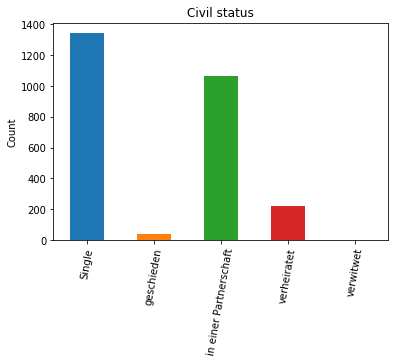

In [66]:
# Civil status
df.groupby(['Wie ist dein aktueller Familienstand?'])['Wie ist dein aktueller Familienstand?'].count().plot(kind='bar')
plt.ylabel("Count")
plt.xticks(rotation = 80)
plt.xlabel("")
plt.title("Civil status")
plt.show();

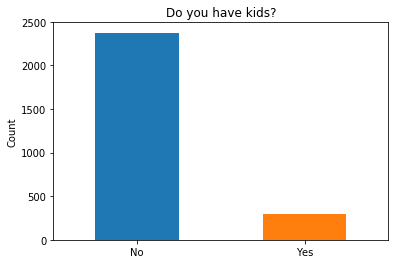

In [68]:
# do you have kids? Yes/No
df.groupby(['Hast du Kinder?'])['Hast du Kinder?'].count().plot(kind='bar')
plt.xticks([0, 1], ['No', 'Yes'], rotation = 0)
plt.xlabel("")
plt.ylabel("Count")
plt.title("Do you have kids?")
plt.show();

Obviously, as we observe that we are mostly targetting young people, it is no surprise that the vast majority is either single or in relationship at most, bus mostly with no children. Married and divorced people are present, but they don't seem to be the most interested ones. 

The younger and more free the customers are, the lower is the probability they would have existing contarcts for insurance products, and therefore the bigger space there is to offer them a product that fits their needs.

We could also have a look at the trends of products purchased by single people versus products purchased by married people starting their families.

In [30]:
# converting the string values representing the purchase of a specific insurance product to binary value 1
# so that it is easier to sum up the nuber products purchased
df.replace(['Auslandskrankenversicherung', 'gesetzliche Krankenversicherung', 'private Krankenversicherung', 'Hausrat','Privathaftpflicht', 'Rechtsschutz', 'Berufsunfähigkeitsversicherung', 'KFZ Versicherung', 'Tierhaftpflicht', 'Drohnenversicherung', 'Unfallversicherung', 'Gebäudeschutzversicherung' , 'Risikolebensversicherung', 'Other.1'], 
                     [1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1], inplace = True)
df = df.fillna(0)

df['Auslandskrankenversicherung'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Auslandskrankenversicherung, dtype: float64

In [31]:
# adding a new column summing the umber of products purchased
for i in df:
    df['products'] = df[['Auslandskrankenversicherung', 'gesetzliche Krankenversicherung', 'private Krankenversicherung', 'Hausrat','Privathaftpflicht', 'Rechtsschutz', 'Berufsunfähigkeitsversicherung', 'KFZ Versicherung', 'Tierhaftpflicht', 'Drohnenversicherung', 'Unfallversicherung', 'Gebäudeschutzversicherung' , 'Risikolebensversicherung']].sum(axis = 1)

In [32]:
# statistics
df.products.describe()

count    2668.000000
mean        2.758621
std         1.730920
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        13.000000
Name: products, dtype: float64

## Question 3:

### Is “travel health insurance” a good product to acquire especially valuable customers?

In [101]:
# creating a helping variable var and storing all the columns of the df that represent insurance products
var = df[['Auslandskrankenversicherung', 'gesetzliche Krankenversicherung', 'private Krankenversicherung', 'Hausrat','Privathaftpflicht', 'Rechtsschutz', 'Berufsunfähigkeitsversicherung', 'KFZ Versicherung', 'Tierhaftpflicht', 'Drohnenversicherung', 'Unfallversicherung', 'Gebäudeschutzversicherung' , 'Risikolebensversicherung', 'Other.1']].sum()

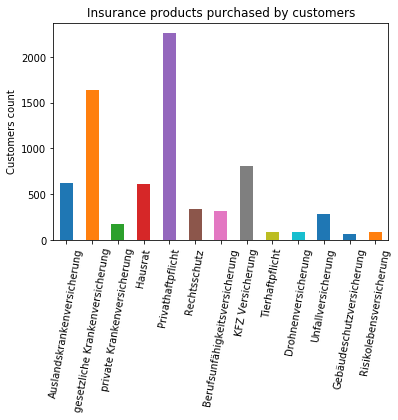

In [72]:
# plotting chart for the insurance products metnioned in the survey
var.plot(kind='bar')
plt.ylabel("Customers count")
plt.xlabel("")
plt.xticks(rotation = 80)
plt.title("Insurance products purchased by customers")
plt.show();

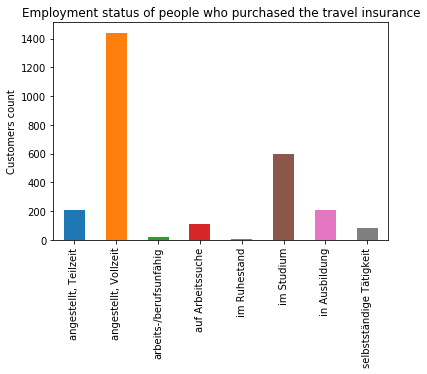

In [93]:
# employment status vs bought travel insurance
df.groupby(['In welchem Beschäftigungsverhältnis stehst du?'])['Auslandskrankenversicherung'].count().plot(kind='bar')
plt.ylabel("Customers count")
plt.xlabel("")
plt.title("Employment status of people who purchased the travel insurance")
plt.show();

As seen above, travel insurance doesn't seem to be the most frequent one. Only around 23% of the customers claimed they have existing travel insurance. It's quite a low number, considering how popular is the trend of travelling these days, which opens doors for selling this product to a big number of people.

Again, those are mostly people that are working full time as this group represents majority of our dataset, but also includes many students. We could also look at the proportions to see more detailed picture.

In [36]:
# importancet of the travel insurance for people who were filling out the surveu
df['Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen)'].describe()

count    2668.000000
mean        3.258996
std         1.223142
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen), dtype: float64

In [96]:
# prefered future features of 'Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen).1'
df['Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen).1'].describe()

count    2668.000000
mean        3.281484
std         1.274715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen).1, dtype: float64

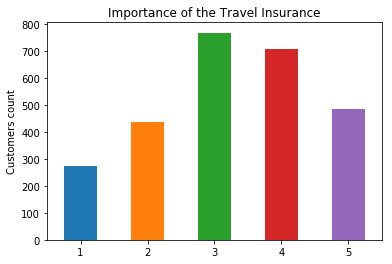

In [95]:
# chart for the travel insurance importance to customers
df.groupby(['Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen)'])['Leben und reisen im Ausland(z.B. Auslandskrankenversicherung, Impfempfehlungen)'].count().plot(kind='bar')
plt.ylabel("Customers count")
plt.xlabel("")
plt.xticks(rotation = 0)
plt.title("Importance of the Travel Insurance")
plt.show();

In average, we observe a medium importance and future preference of this insurance to people. Data is normally distributed, having the value 3.3 as the average level of importance assigned. From this basic visualisation we don't observe any special importance of the travel insurance, but we could compare it further to the ditributions of other products.

However, we could get a better understanding of how important this insurance in particular is for the customers who were filling out the survey by looking at the other reponses and assess whether there is potential for them to buy it. 

In [38]:
# just drafting a very basic representation of the number of customers who purchased the travel 
# insurance and 1,2,3,4,5,67,8,9 or 10 other insurance products
travel_1 = df.query('Auslandskrankenversicherung == "1" & products == "1"').id.count()
travel_2 = df.query('Auslandskrankenversicherung == "1" & products == "2"').id.count()
travel_3 = df.query('Auslandskrankenversicherung == "1" & products == "3"').id.count()
travel_4 = df.query('Auslandskrankenversicherung == "1" & products == "4"').id.count()
travel_5 = df.query('Auslandskrankenversicherung == "1" & products == "5"').id.count()
travel_6 = df.query('Auslandskrankenversicherung == "1" & products == "6"').id.count()
travel_7 = df.query('Auslandskrankenversicherung == "1" & products == "7"').id.count()
travel_8 = df.query('Auslandskrankenversicherung == "1" & products == "8"').id.count()
travel_9 = df.query('Auslandskrankenversicherung == "1" & products == "9"').id.count()
travel_10 = df.query('Auslandskrankenversicherung == "1" & products == "10"').id.count()
travel_11 = df.query('Auslandskrankenversicherung == "1" & products == "11"').id.count()
travel_1, travel_2, travel_3,travel_4,travel_5,travel_6,travel_7,travel_8,travel_9,travel_10,travel_11

(9, 39, 148, 160, 128, 68, 36, 25, 4, 1, 0)

Almost all of the customers purchasing the travel insurance also purchased other products (usually 2-4 other products), which could be an indicator of the value of the customer. Based on this statistics we could conclude that people with the travel insurance already have other insurance that we cant really sell them again, but it might also mean that these customers tend to buy more insurance products, and therefore still have some potential. To be sure about this finding, I would look at the other products from this angle and compare the results further.

# Conclusion and Final Findings

To conclude this analysis, I would just sum up all my findins in a short summary:

We could see the customers Getsafe acquired are the so-called Milenials, young adults around 20-35 years old. 40% of these are people who just started heir first jobs. We are msotly dealing with people who live either single or in relationships, however they are mostly not married and have no kids. Majority owns cars but doesn't own properties they live in.

In average, these customers buy 2-3 insurance products.

Having a look at the travel insurance in particular, we can conclude that although only around 23% of customers claim they have purchased the travel insurance, most of them have also purchased 2-4 other products too. This indicates the great buying force  and potential of this group.

## Recommendations and Suggestions

Even though the data represented in this case study could be considered as clean, I have to admit I was struggling a little with not that intuitive questions. Based on the lacking information about the meaning of the scale from 0 to 5 for some questions, I was working with an assumption that this scale represents the importance of the products in the eyes of customers (5 being of the highest importance).

Not finding an exceptional importance of the travel insurance, however I see potential in the car insurance (more than 70% of the customers could be sold this product).

Even though not being that familiar with the surveys and categorical data, I still enjoyed working on the case study and I wish I could continue to explore it further. No doubts, there is a lot of work that requires more time, but this could be done in the next steps - from comparison of all conditions and groups of ages, employment statuses, number of products purchased, importance of products versus their actual purchase, to a simple k-means clustering to get the perfect customer, or to a further logistic regression. I am sure there is a lot of information still uncovered.

The dataset has a lot to offer and represents a great project for a continuous data analysis. Especialy interesting might be to watch the life time value of these customers.